In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor

In [2]:
co2_data= pd.read_csv(r"co2-mm-mlo_csv (1).csv")

In [3]:
dates = co2_data['Date']
Average_co2 = co2_data['Average']
plot = {}
count = {}
for i in range(len(dates)):
    year = dates[i][-4:]
    if year not in plot.keys():
        plot[year] = Average_co2[i]
        count[year] = 1
    else:
        plot[year] += Average_co2[i]
        count[year] += 1

for i in plot.keys():
    plot[i] = plot[i]/count[i]
plot
years = plot.keys()
years = list(years)
average_co2 = plot.values()
average_co2 = list(average_co2)
d= {'Year' : years, 'Average' : average_co2}
co2_df = pd.DataFrame(d)
co2_df

,Year,Average
0,1958,232.267000
1,1959,315.974167
2,1960,316.907500
3,1961,317.637500
4,1962,318.450833
...,...,...
56,2014,398.647500
57,2015,400.834167
58,2016,404.239167
59,2017,406.553333


In [4]:
co2_df['Year']=co2_df['Year'].astype(str).astype(int)

In [5]:
co2_df = co2_df.rename({'Average': 'Average_Co2'}, axis=1)

In [6]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         61 non-null     int64  
 1   Average_Co2  61 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [7]:
dis_data = pd.read_csv(r"time-series-disasters-1980-2022.csv")

In [8]:
dis_data

,Year,All Disasters Count
0,1980,3
1,1981,1
2,1982,2
3,1983,4
4,1984,2
5,1985,5
6,1986,2
7,1987,0
8,1988,1
9,1989,4


In [9]:
test56=pd.merge(co2_df,dis_data,on='Year',how='inner')

In [10]:
test56.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 39 non-null     int64  
 1   Average_Co2          39 non-null     float64
 2   All Disasters Count  39 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.2 KB


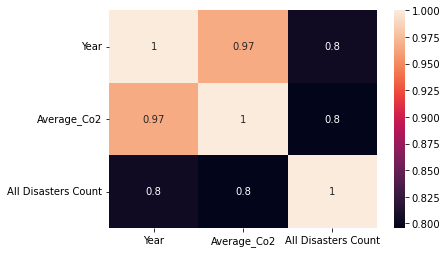

In [11]:
corrMatrix99=test56.corr()
sns.heatmap(corrMatrix99,annot=True)
plt.show()

In [90]:
target='All Disasters Count'
Y=test56[target]
X= test56[['Average_Co2']]

In [91]:
# X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.10,random_state=42, shuffle=False)
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.10,random_state=42)

In [93]:
y_pred=[Y_train.mean()]*len(Y_train)
print('Baseline MAE:', round(mean_absolute_error(Y_train,y_pred),5))

Baseline MAE: 3.14122


In [94]:
forestModel=make_pipeline(
    SelectKBest(k="all"),
    StandardScaler(),
    RandomForestRegressor(
        n_estimators=100,
        max_depth=50,
        random_state=77,
        n_jobs=-1)
)
forestModel.fit(X_train,Y_train)

Pipeline(steps=[('selectkbest', SelectKBest(k='all')),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=50, n_jobs=-1,
                                       random_state=77))])

In [95]:
print("Random Forest Regression Training MAE: ",round(mean_absolute_error(Y_train,forestModel.predict(X_train)),5))
print("Random Forest Regression Validation MAE: ",round(mean_absolute_error(Y_val,forestModel.predict(X_val)),5))


Random Forest Regression Training MAE:  0.91886
Random Forest Regression Validation MAE:  0.6975


In [96]:
y_pred1=forestModel.predict(X_val)

In [97]:
score = r2_score(Y_val,y_pred1)*100
score

97.58863961813843